# Analysis

In [1]:
#import modules for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import modules for modeling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [2]:
#load dataset
df = pd.read_csv('Data/priceFood.csv', index_col='date', parse_dates=True)
print(f"voici le shape: {df.shape} \n")
print(f"Les differentes variables: {df.columns} \n")
df.head(10)

voici le shape: (34439, 13) 

Les differentes variables: Index(['admin1', 'admin2', 'market', 'latitude', 'longitude', 'category',
       'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'price',
       'usdprice'],
      dtype='object') 



,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
date,,,,,,,,,,,,,
#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
2000-01-15,Dakar,Dakar,Tilene,14.6849802,-17.4572673,cereals and tubers,Maize (imported),KG,actual,Retail,XOF,149.0,0.2592
2000-01-15,Dakar,Dakar,Tilene,14.6849802,-17.4572673,cereals and tubers,Millet,KG,actual,Retail,XOF,124.75,0.217
2000-01-15,Dakar,Dakar,Tilene,14.6849802,-17.4572673,cereals and tubers,Rice (imported),KG,actual,Retail,XOF,227.5,0.3958
2000-01-15,Dakar,Dakar,Tilene,14.6849802,-17.4572673,cereals and tubers,Sorghum,KG,actual,Retail,XOF,125.0,0.2175
2000-02-15,Dakar,Dakar,Tilene,14.6849802,-17.4572673,cereals and tubers,Maize (imported),KG,actual,Retail,XOF,150.0,0.261
2000-02-15,Dakar,Dakar,Tilene,14.6849802,-17.4572673,cereals and tubers,Millet,KG,actual,Retail,XOF,125.62,0.2185
2000-02-15,Dakar,Dakar,Tilene,14.6849802,-17.4572673,cereals and tubers,Rice (imported),KG,actual,Retail,XOF,226.88,0.3947
2000-02-15,Dakar,Dakar,Tilene,14.6849802,-17.4572673,cereals and tubers,Sorghum,KG,actual,Retail,XOF,125.62,0.2185


In [3]:
#drop les variables longitude, latitude et l'index de la ligne: 0:1 du df  
df = df.drop(['latitude', 'longitude', 'usdprice'], axis=1)
df = df.drop(df.index[0:1])
print(f"new shape: {df.shape}")

new shape: (34438, 10)


In [4]:
df.isnull().values.any()

False

In [5]:
#voir le nombre d'elemnts dans admin1, 2 et le market (emplacement du marche)
admin1 = df['admin1'].value_counts()
admin2 = df['admin2'].value_counts()
market = df['market'].value_counts()
print(f"Pour la variable admin1:\n{admin1} \n \nPour la variable admin2: \n{admin2} \n \nPour la variable market: \n{market} ")

Pour la variable admin1:
Fatick         4080
Dakar          3470
Diourbel       3153
Matam          2891
Thies          2884
Tambacounda    2590
Kaolack        2554
Louga          2546
Saint Louis    2461
Kaffrine       2329
Kolda          2053
Ziguinchor     1644
Kedougou       1223
Sedhiou         560
Name: admin1, dtype: int64 
 
Pour la variable admin2: 
Dakar           2655
Matam           2116
Fatick          2081
Kolda           2053
Saint Louis     1879
Louga           1815
Foundiougne     1681
Thies           1675
Diourbel        1476
Birkelane       1452
Kaolack         1361
Koumpentoum     1273
Nioro Du Rip    1193
Kedougou         949
Ziguinchor       920
Mbacke           874
Pikine           815
Bambey           803
Kanel            743
Tambacounda      740
Kebemer          731
Mbour            661
Bignona          641
Kaffrine         627
Bakel            577
Sedhiou          560
Tivaoune         548
Gossas           318
Podor            317
Salemata         274
Dagana   

In [6]:
#voir le nombre de category existant dans le dataframe
df['category'].value_counts()

cereals and tubers    33738
pulses and nuts         700
Name: category, dtype: int64

In [7]:
#voir les differentes commodite du dataframe
commanditees = df['commodity'].unique()
df['commodity'].value_counts()

Millet                             7852
Rice (imported)                    7647
Maize (local)                      5904
Sorghum                            5477
Maize (imported)                   3693
Rice (local)                       2498
Beans (niebe)                       669
Rice (ordinary, first quality)      518
Sorghum (imported)                  114
Rice (ordinary, second quality)      35
Groundnuts (shelled)                 18
Groundnuts (unshelled)               13
Name: commodity, dtype: int64

In [8]:
print(f"existance de donnees dupliques: {df.index.is_unique}")
print(f"La taille de ces index: {len(df.index.duplicated())} \n")

existance de donnees dupliques: False
La taille de ces index: 34438 



In [9]:
def testDuplicate(var, df):
    if var == "False":
        return "existant"
    
    return f"Tout est ok avec un shape de {df.shape}"

In [10]:
#supprimer les valeurs doubles:
df = df.loc[~df.index.duplicated(), :]
test = df.index.is_unique
testDuplicate(test, df)

'Tout est ok avec un shape de (261, 10)'

In [11]:
print(f"Les commodites: {df['commodity'].unique()}")
print(f"Les regions {df['admin1'].unique()}")
print(f"Les differentes villes: {df['admin2'].unique()}")
print(f"Les differentes markets: {df['market'].unique()}")

Les commodites: ['Maize (imported)' 'Millet' 'Rice (imported)' 'Maize (local)'
 'Rice (local)' 'Beans (niebe)']
Les regions ['Dakar']
Les differentes villes: ['Dakar']
Les differentes markets: ['Tilene' 'Castors' 'Dakar' 'Gueule Tapee']


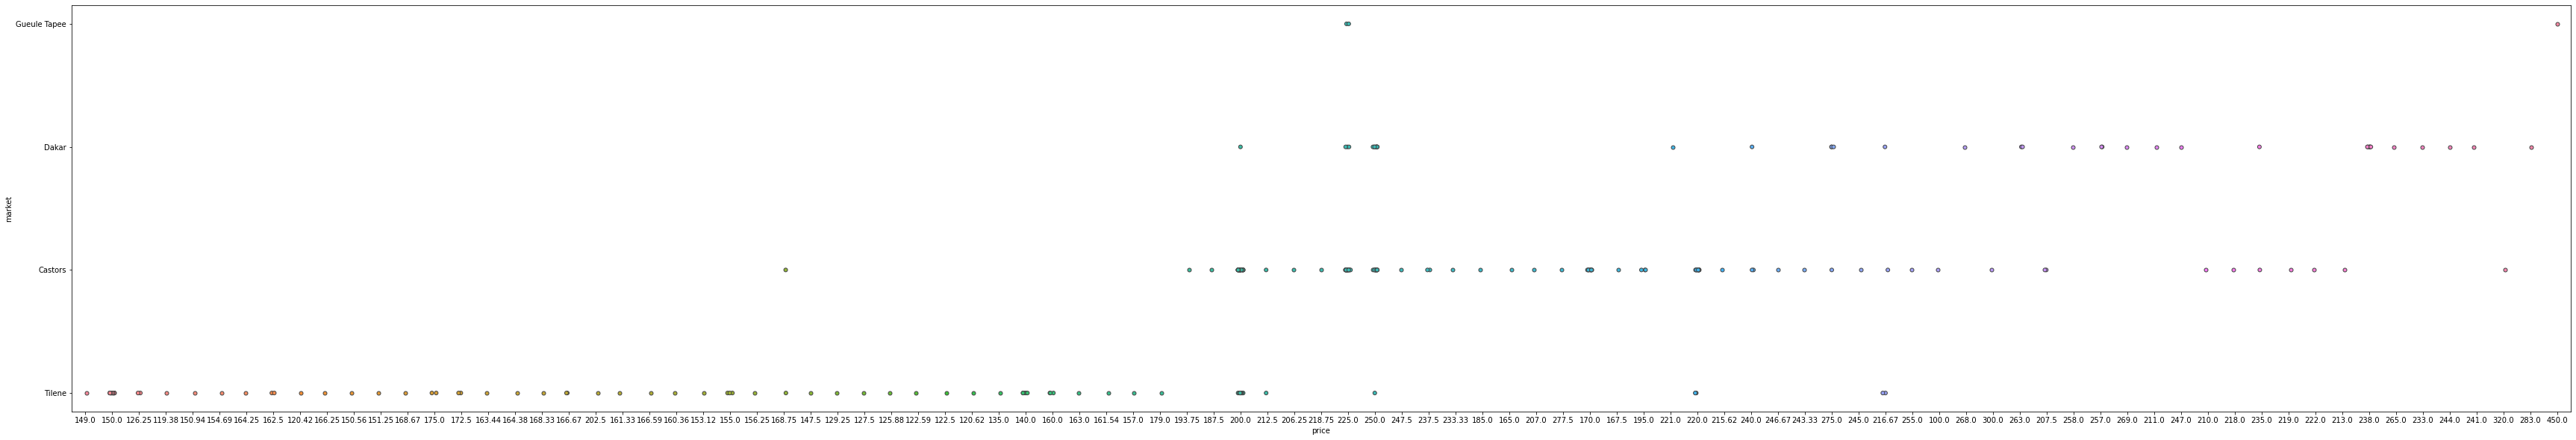

In [12]:
"""#calcul du prix des differents marches
tilene = df[df['market']=='Tilene'][df['commodity']=='Maize (imported)']['price']
castor = df[df['market']=='Castors'][df['commodity']=='Maize (imported)']['price']
dakarMarket = df[df['market']=='Dakar'][df['commodity']=='Maize (imported)']['price']
tapee = df[df['market']=='Gueule Tapee'][df['commodity']=='Maize (imported)']['price']
marketsPrice= [tilene, castor, dakarMarket, tapee]
"""

#data visualisation
plt.figure(figsize=(60,10))
sns.stripplot(x="price", y="market", data=df,
                   linewidth=1)
plt.show()

In [13]:
#Les variales sur les differents commodites
maizeImported = df[df['commodity']=='Maize (imported)']['price']
millet = df[df['commodity']=='Millet']['price']
RiceImported = df[df['commodity']=='Rice (imported)']['price']
maizeLocal = df[df['commodity']=='Maize (local)']['price']
riceLocal = df[df['commodity']=='Rice (local)']['price']
beans = df[df['commodity']=='Beans (niebe)']['price']

#boule for pour tout afficher a la fois
for i in (maizeImported, millet, RiceImported, maizeLocal, riceLocal, beans):
    print(i.shape)

(207,)
(44,)
(1,)
(7,)
(1,)
(1,)


In [14]:
#dakar.sort_values(ascending=True)

#voir le nombre de commodity existe il depuis le supp des donnees dupliquer
print(df['commodity'].unique())

['Maize (imported)' 'Millet' 'Rice (imported)' 'Maize (local)'
 'Rice (local)' 'Beans (niebe)']


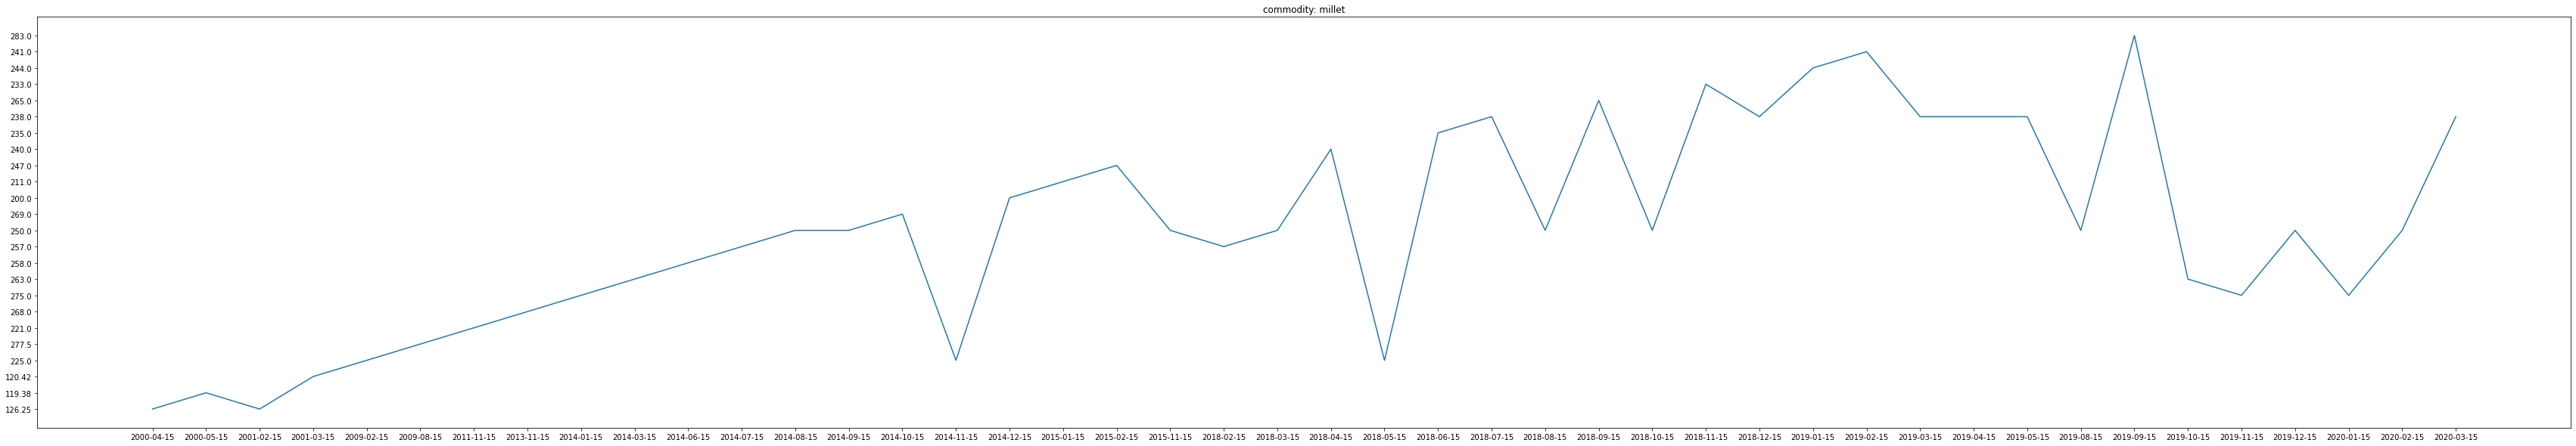

In [15]:
plt.figure(figsize=(60,10))
plt.plot(millet)
plt.title("commodity: millet")
plt.show()

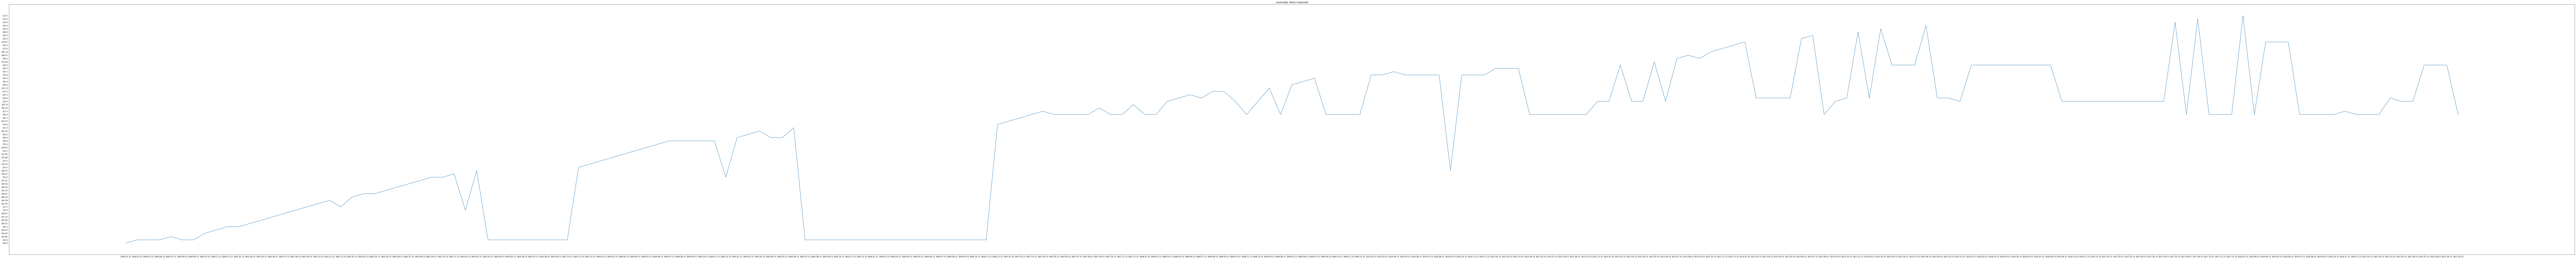

In [16]:
plt.figure(figsize=(250, 25))
plt.plot(maizeImported)
plt.title("commodity: Maize (imported)")
plt.show()

In [17]:
#suite aux manque de plusieurs donnees nous allons creer un model qui va predire le prix en XOF de du (Maize imported)

# Modeling

In [18]:
#selection de la valeur precise pour le dataset
df = df[df['commodity']=='Maize (imported)']
print(df.shape)
df.head()

(207, 10)


,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,currency,price
date,,,,,,,,,,
2000-01-15,Dakar,Dakar,Tilene,cereals and tubers,Maize (imported),KG,actual,Retail,XOF,149.0
2000-02-15,Dakar,Dakar,Tilene,cereals and tubers,Maize (imported),KG,actual,Retail,XOF,150.0
2000-03-15,Dakar,Dakar,Tilene,cereals and tubers,Maize (imported),KG,actual,Retail,XOF,150.0
2000-06-15,Dakar,Dakar,Tilene,cereals and tubers,Maize (imported),KG,actual,Retail,XOF,150.0
2000-07-15,Dakar,Dakar,Tilene,cereals and tubers,Maize (imported),KG,actual,Retail,XOF,150.94


In [19]:
#drop les differentes data
df = df.drop(["admin1", "admin2", "priceflag", "pricetype", "currency"], axis=1)

In [20]:
#Creation des targets (y) et les features (x)
y = df['price']
x = df.drop('price', axis=1)
print(f"le shape du target: {y.shape}")
print(f"le shape du feature: {x.shape}")

le shape du target: (207,)
le shape du feature: (207, 4)


In [21]:
#encoder le feature
X_encoder = OneHotEncoder()
X = X_encoder.fit_transform(x)
print(X)

  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (1, 3)	1.0
  (1, 4)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (2, 3)	1.0
  (2, 4)	1.0
  (2, 5)	1.0
  (2, 6)	1.0
  (3, 3)	1.0
  (3, 4)	1.0
  (3, 5)	1.0
  (3, 6)	1.0
  (4, 3)	1.0
  (4, 4)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
  (5, 3)	1.0
  (5, 4)	1.0
  (5, 5)	1.0
  (5, 6)	1.0
  (6, 3)	1.0
  :	:
  (200, 6)	1.0
  (201, 2)	1.0
  (201, 4)	1.0
  (201, 5)	1.0
  (201, 6)	1.0
  (202, 2)	1.0
  (202, 4)	1.0
  (202, 5)	1.0
  (202, 6)	1.0
  (203, 3)	1.0
  (203, 4)	1.0
  (203, 5)	1.0
  (203, 6)	1.0
  (204, 3)	1.0
  (204, 4)	1.0
  (204, 5)	1.0
  (204, 6)	1.0
  (205, 3)	1.0
  (205, 4)	1.0
  (205, 5)	1.0
  (205, 6)	1.0
  (206, 3)	1.0
  (206, 4)	1.0
  (206, 5)	1.0
  (206, 6)	1.0


In [22]:
chi2(X, y)
selector = SelectKBest(chi2, k=5)
selector.fit_transform(X, y)
print(x.columns)
selector.get_support()

Index(['market', 'category', 'commodity', 'unit'], dtype='object')


array([ True,  True,  True,  True, False, False,  True])

In [23]:
#une erreur s'est produit dans la fonction SelectKBest a voir pourquoi.

In [24]:
#separer nos differentes data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
print(f"pour le features: \ndata train:{X_train.shape} \ndata test: {X_test.shape}")
print(f"pour le targets: \ndata train:{Y_train.shape} \ndata test: {Y_test.shape}")

pour le features: 
data train:(165, 7) 
data test: (42, 7)
pour le targets: 
data train:(165,) 
data test: (42,)


In [25]:
#La standarisation + le modeling avec Lasso pour une regression lineair
model_A = make_pipeline(StandardScaler(with_mean=False), Lasso())

#train the model
model_A.fit(X_train, Y_train)

#evaluate model
print(model_A.score(X_test, Y_test))

0.4444766537321323
